**목표**

- 불순도를 줄이는 방향으로 계속 분할해 나간다
- 불순도의 종류는 다양하다
- 예측속도는 빠르나 훈련속도가 느리다
- 장점
    - 이해하기 쉽고, 보기 쉽고, 성능도 좋다
    - 전처리가 필요없다
- 제한사항
    - 모든 분할이 축에 수직이라서 훈련세트의 회전에 민감하다
    - 과대적합 가능성이 높다
    - 훈련데이터의 작은 변화에도 민감하다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#6.1 결정 트리 학습과 시각화

In [2]:
#붓꽃 데이터 훈련

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]   #꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

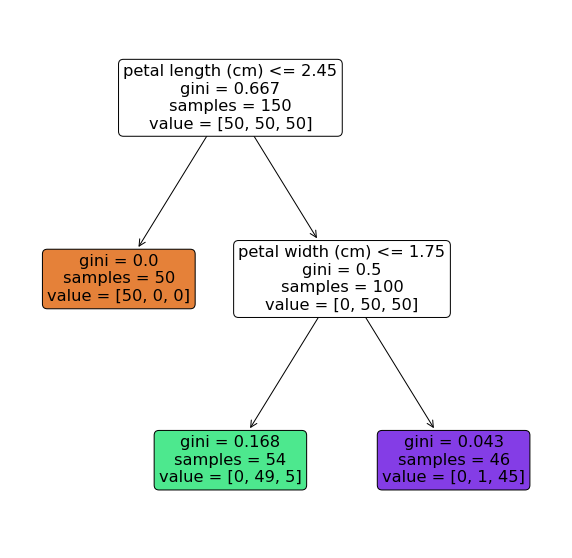

In [3]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(tree_clf, filled=True, rounded=True, feature_names=iris.feature_names[2:])
plt.show()

#6.2 예측하기

**예측 방법**

- 샘플이 들어오면 루트노드부터 조건을 따진다
- True이면 왼쪽, False이면 오른쪽 자식으로 간다
- 리프노드까지 검사한다..

**그림 분석**

- 조건문 : 각 노드에서 수행하는 분류 조건
- gini : 각 노드에서의 지니 불순도
- samples : 각 노드에 적용된 훈련 샘플 수
    - ex) [50,50,50] : 각 클래스마다 50개의 샘플이 있다
- value : 각 노드에서의 클래스 별 샘플 수
- class : 예측 결과

**불순도**

- 얼마나 샘플이 섞여있는지 알려주는 값
- 여기서는 **지니 불순도**사용

In [4]:
# 결정경계를 그리는 함수 가져오기..

from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

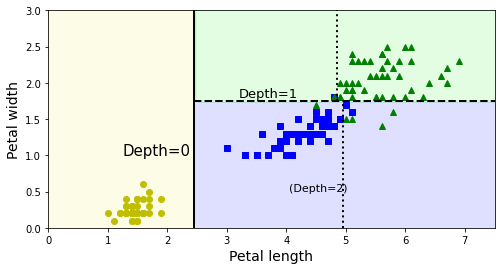

In [5]:
#결정경계 그림..

plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.25, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

**분석**

- 붓꽃 데이터셋의 결정트리 생긴 경계를 그림으로 나타냄
- 책에서는 max_depth=2로 했으므로 2번의 경계 즉, 그림의 Depth=1까지가 실제 그림이다
- max_depth=3까지 했으면 Depth=2 선이 추가되었을 것이다

###max_depth=3인 트리의 결정경계

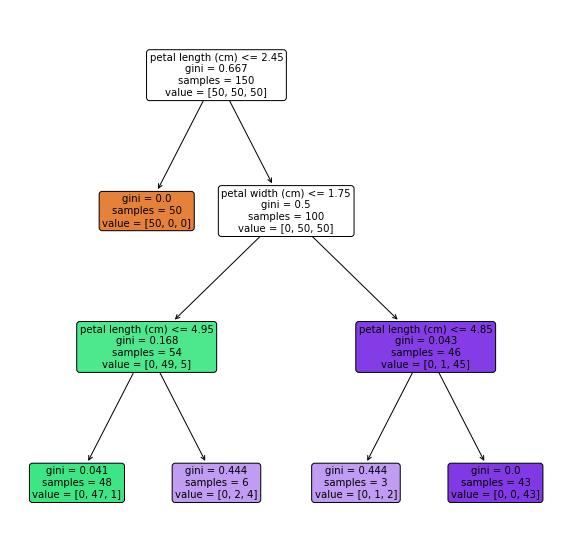

In [6]:
#max_depth=3 지정시 그림..

tree_clf_max_depth_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_max_depth_3.fit(X, y)

plt.figure(figsize=(10,10))
plot_tree(tree_clf_max_depth_3, filled=True, rounded=True, feature_names=iris.feature_names[2:])
plt.show()

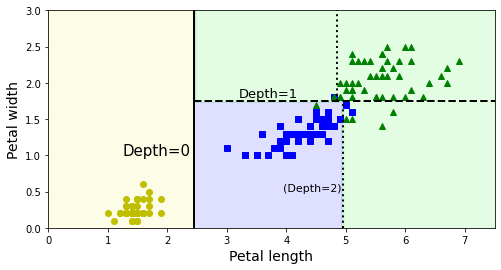

In [7]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_max_depth_3, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.25, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(3.95, 0.5, "(Depth=2)", fontsize=11)

plt.show()

**분석**

- 위의 max_depth=2일 때와 초록색 보라색 구역이 다르다

#6.3 클래스 확률 추정

**클래스 K일 확률 추정 방법**

- 위의 예측 방법을 따라 샘플에 대한 리프노드를 찾는다
- 그 리프노드의 클래스 K의 훈련 샘플의 비율을 반환한다..
- 예측은 가장 높은 확률을 가진 클래스를 예측으로 출력함..

즉,

- $
확률 = 
\dfrac{클래스 K인 훈련 샘플 수}{전체 샘플 수}
$

- 확률들 중 가장 큰 클래스로 예측함

In [8]:
#확률

tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
#예측

tree_clf.predict([[5, 1.5]])

array([1])

In [10]:
iris.target_names[tree_clf.predict([[5, 1.5]])]

array(['versicolor'], dtype='<U10')

#6.4 CART 훈련 알고리즘

**분류에 대한 CART 비용 함수**

$
\begin{split}
&J(k, t_k) = \dfrac{m_{\text{left}}}{m}G_\text{left} + \dfrac{m_{\text{right}}}{m}G_{\text{right}}\\
\\
&\text{여기에서 }\begin{cases}
G_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 불순도}\\
m_\text{left/right} \text{는 왼쪽/오른쪽 서브셋의 샘플 수}
\end{cases}
\end{split}
$

\\
$G_\text{left/right}$ 가 작을수록 $J(k, t_k)$가 작아진다

---
**CART 알고리즘**

- CART 알고리즘은 **그리디 알고리즘**이다
- 결정 트리를 훈련시키기 위해 CART 알고리즘을 사용
- 훈련 세트를 하나의 특성 k의 임계값 $t_k$를 사용해서 두 개의 서브셋으로 나눈다
    - ex) 꽃잎의 길이 $\le 0cm$
- $(k, t_k)$ 짝을 위의 비용 함수가 최소화 하도록 찾는다
- 지정한 중지조건에 도달하거나 **불순도를 줄이는 분할을 찾을 수 없을 때** 그만한다

#6.5 계산 복잡도

m 개의 샘플, n 개의 특성을 가진 데이터 셋에 대하여..

**예측 속도**

- 특성수와 관련없이 $O(log_2(m))$
- 모든 m개의 샘플이 각각 리프노드 하나에 대응되는 최악의 상황에도 $O(log_2(m))$
- 큰 훈련세트에 대해서도 예측 속도가 **빠름**

**훈련 속도**

- $O(n * m log_2(m))$
- 각 노드에서 모든 샘플의 모든 특성을 비교해서 최고의 $(k, t_k)$짝을 찾아야함..
- 큰 훈련세트에 대해서는 **많이 느림**

#6.6 지니 불순도 또는 엔트로피?

- 불순도는 모두 클수록 섞여있고, 작을수록 순수함
- **정보이득** : 부모와 자식노드의 불순도 차
- 이 **정보이득**이 가장 크도록 노드를 분리함

**1) 지니 불순도**

- 기본값으로 지정됨
- $
G_i = 1 - \sum\limits_{k=1}^{n}{{p_{i,k}}^2}
$

**2) 엔트로피 불순도**

- $
H_i = -\sum\limits_{k=1 \atop p_{i,k} \ne 0}^{n}{{p_{i,k}}\log_2(p_{i,k})}
$
- $p_{i,k}$ : i번째 노드의 훈련샘플 중 클래스 k에 속한 샘플의 비율

---

**둘의 차이**
- 거의 똑같다
- 속도는 지니 불순도가 조금 더 빠름
- 엔트로피가 좀 더 균형잡힌 트리를 만듦

#6.7 규제 매개변수

**비피라미터 모델(비모수 모델)**
- 훈련되기 전에 파라미터 수가 결정되지 않음
- 모델 구조가 고정되지 않고 자유롭다
- 대부분 **과대적합** 가능성이 높다

**파라미터 모델(모수 모델)**
- 미리 정의된 모델 파라미터 수를 가진다
- 자유도가 제한된다..

[비모수 모델 vs 모수 모델 vs 세미모수 모델](https://brunch.co.kr/@seoungbumkim/7)
- 모델 구축 시, 확률분포 가정을 사용하는지 여부에 따라 나눈다..

**규제**

- 트리의 자유도를 제한한다
- 종류
    - max_depth : 최대 깊이
    - max_leaf_nodes : 최대 리프노드 수
    - max_features : 노드 분할 시 사용할 최대 특성 수
    - min_samples_split : 노드 분할을 위해 필요한 최소 샘플 수
    - min_samples_leaf : 리프노드가 가져야할 최소 샘플 수
    - min_weight_fraction_leaf : 가중치가 부여된 전체 샘플 수에서의 비율
- min_, max_가 들어간 매개변수들은 각각 증가, 감소 시키면 규제가 커진다..

**가지치기 알고리즘**

- 사이킷런은 사전 가지치기만 지원
- 대표적으로 $\chi^2$ 검정을 이용해서 우연히 순도향상이 된 것인지 확인..
- $\chi^2$의 값이 커지면 $p-값$이 작아진다
- $p-값$이 임계값보다 높으면 순도 향상이 우연히 된 것으로 판단, 자식노드 삭제..

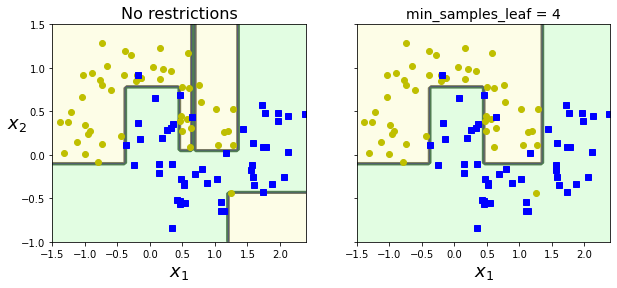

In [11]:
# moons 데이터 셋을 규제가 다른 결정 트리로 훈련

from sklearn.datasets import make_moons
#100개의 샘플 가져옴
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

#규제가 다른 모델을 만들어서 훈련
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

#결정경계 출력..
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.show()

**분석**
 \\
1) 왼쪽
- 규제가 없어서 굉장히 과대적합되었다
- 일반화 별로 안좋음

2) 오른쪽
- 규제가 있으니까 과대적합 안됨..
- 일반화 good!

#6.8 회귀

- 회귀도 가능..
- DecisionTreeRegressor로 가능..

In [12]:
# 2차식 형태의 데이터셋 생성..

np.random.seed(42)

m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m,1) / 10

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

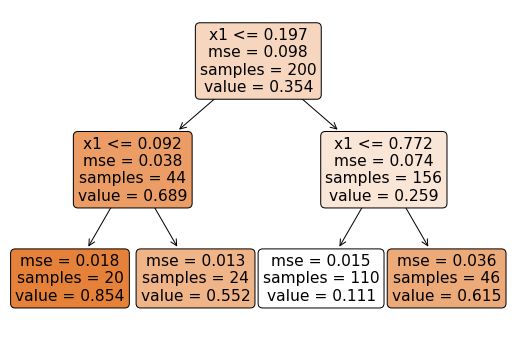

In [14]:
plt.figure(figsize=(9,6))
plot_tree(
    tree_reg,
    filled=True,
    rounded=True,
    feature_names=["x1"]
)
plt.show()

**분석**

- DecisionTreeClassifier와 비슷..
- mse : 각 노드의 샘플들의 예측(value)과의 MSE의 평균
- samples : 각 노드의 샘플 수
- value : 노드에 있는 샘플들의 평균 타깃값

---
**회귀에 대한 CART 비용함수**

$
J(k, t_k) = \dfrac{m_{\text{left}}}{m}MSE_\text{left} + \dfrac{m_{\text{right}}}{m}MSE_\text{right}\\
$

- $
\text{여기에서 }\begin{cases}
MSE_\text{node} = \sum\limits_{i \in node}(\hat{y}_{\text{node}} - y^{(i)})^2 \\
\hat{y}_{\text{node}} = \dfrac{1}{m_{\text{node}}} \sum\limits_{i \in node}y^{(i)}
\end{cases}\\
$

즉, 

- $MSE_{\text{node}}$ : 예측값($\hat{y}_{\text{node}}$)과 실제 레이블과의 MSE
- $\hat{y}_{\text{node}}$ : i번째 노드에 있는 샘플들의 평균을 예측으로 삼음..

###규제를 달리한 결정트리 회귀

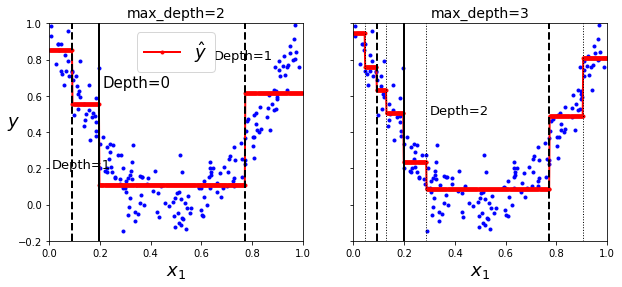

In [15]:
from sklearn.tree import DecisionTreeRegressor

#규제가 다른 두 모델의 생성 및 학습
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

#회귀 예측을 그리는 함수..
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    #데이터는 점으로
    plt.plot(X, y, "b.")
    #예측은 빨간 선으로..
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

#max_depth=2인 모델..
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
#결정경계를 따라 선을 긋는다..
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

#max_depth=3인 모델..
plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
#결정경계를 따라 선긋기..
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

**분석**

- 오른쪽이 더 데이터에 잘 맞는다..
- 각 구간에서 예측은 샘플들의 타깃값 평균이다..

###규제의 유무에 따른 과대적합 여부

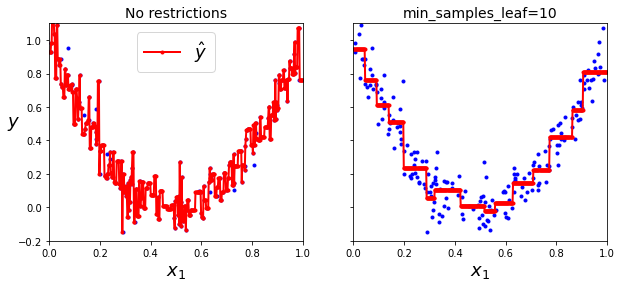

In [16]:
#규제가 있고, 없는 두 모델을 각각 생성 및 훈련
tree_reg3 = DecisionTreeRegressor(random_state=42)
tree_reg4 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg3.fit(X, y)
tree_reg4.fit(X, y)

#예측..
x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred3 = tree_reg3.predict(x1)
y_pred4 = tree_reg4.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

#규제가 없는 모델을 그림..
plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred3, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

#규제를 둔 모델을 그림..
plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred4, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg4.min_samples_leaf), fontsize=14)

plt.show()

**분석**

- 왼쪽은 과대적합..
    - 결정트리는 모델의 자유도가 높다
- 오른쪽은 훨씬 그럴싸 하다..

###분류와의 차이

- 불순도 대신 MSE를 최소화하도록 노드를 분할한다
- 다른 CART 비용함수..
- 다른건 다 비슷..

#6.9 불안정성

- 장점
    - 이해하고 해석에 용이하다
    - 사용하기 편하고, 성능도 뛰어나다
    - 전처리가 필요없다..

- **제한 사항**
    - 모든 분할이 축에 수직이다..
    - 즉, 계단 모양의 결정 경계를 만든다..
    - 그래서 훈련세트의 회전에 민감하다
    - 훈련 데이터의 작은 변화에도 매우 민감하다..

###데이터 셋의 회전에 따른 결정 경계 변화

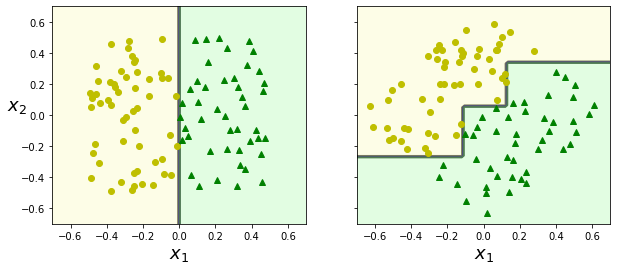

In [17]:
np.random.seed(6)
#특성 2개..
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4

#선대에 나왔썬 rotation_matrix (회전시키는 행렬)
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

#다른 데이터로 훈련.. 회전한 것과 안한 것
tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)


fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
#각각 그림을 그린다
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

**분석**

- 오른쪽 데이터 셋은 왼쪽의 데이터 셋을 45도 회전시킨 것이다
- 민감하게 반응해서 결정경계가 크게 바뀌었다..

###데이터 셋의 세부사항에도 민감한 결정트리

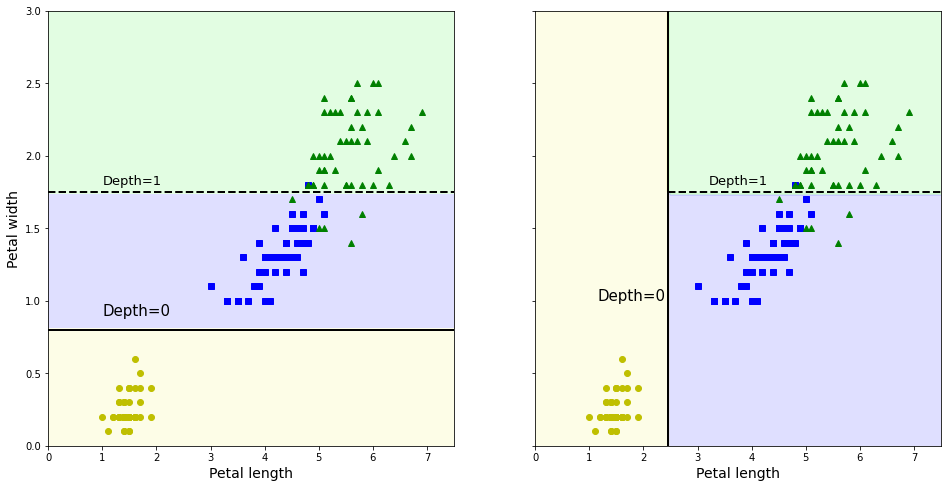

In [18]:
#훈련 데이터 준비
iris = load_iris()
X = iris.data[:, 2:]   #꽃잎의 길이와 너비
y = iris.target

#random_state를 다르게 준다..
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf.fit(X, y)
tree_clf_tweaked.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(16,8), sharey=True)

plt.sca(axes[0])
plot_decision_boundary(tree_clf_tweaked, X, y, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

plt.sca(axes[1])
plot_decision_boundary(tree_clf, X, y, legend=False)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.15, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.ylabel("")

plt.show()

**분석**

- 훈련 알고리즘이 확률적이다..
- 같은 훈련 데이터에서도 random_state 매개변수를 지정하지 않으면 다른 모델을 얻게 될 수도 있다

---
###해결 방안

- 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법 사용..(8장)
- 랜덤포레스트사용.. (불안정성 해소)